<a href="https://colab.research.google.com/github/K-AMO/load-shortfall-regression-predict-api/blob/master/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

PARAMETER_CONSTANT = 40

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv',index_col=0)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Our features are:
    
    - Time
    - Madrid_wind_speed
    - Valencia_wind_deg
    - Bilbao_rain_1h
    - Valencia_wind_speed
    - Seville_humidity
    - Madrid_humidity
    - Bilbao_clouds_all
    - Bilbao_wind_speed
    - Seville_clouds_all
    - Madrid_temp_max
    - Barcelona_temp
    - Bilbao_temp_min
    - Bilbao_temp
    - Barcelona_temp_min
    - Barcelona_temp_max
    - Seville_temp_min
    - Madrid_temp
    - Madrid_temp_min
    - load_shortfall_3h
    
The types of visualisations we can create differ depending on the data type of each variable.
Broadly, we need to determine whether a variable is numerical, or categorical. Currently there are zero **categorical** features. `TIME`, `Madrid_wind_speed`, `Valencia_wind_deg`, `Bilbao_rain_1h`, `Valencia_wind_speed`, `Seville_humidity`, `Madrid_humidity`, `Bilbao_clouds_all`, `Bilbao_wind_speed`, `Seville_clouds_all`, `Madrid_temp_max`, `Barcelona_temp`, `Bilbao_temp_min`, `Bilbao_temp`, `Barcelona_temp_min`, `Barcelona_temp_max`, `Seville_temp_min`, `Madrid_temp`, `Madrid_temp_min` and `load_shortfall_3h` are all **numerical.** This is confirmed by looking specifically at the data type of each feature.

In [3]:


df.shape

(8763, 48)


The shape command shows us that we have **8763** rows of data and **48** features.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is **object** 
and if it is a numerical variable the Dtype is an **int64** or **float64.** This command also shows us that out of the 8763 none 
of the features contain any null values.

Null values for each feature can also be checked by using the following command:

- df.isnull().sum()

This command will provide the total number of null values appearing in each feature.

In [5]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

The command is highlighting that Valencia_pressure is our one null value in the data and it consist of 2068 missing values. 

In the next command we fill the missing data with the [0] value since it's a numerical variable feature.

In [6]:

df.fillna(df.median()[0].round(1), inplace=True)
print(df.isnull().sum())

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

This confirms that there are no more null values in the data.

 Univariate Analysis: Non-Graphical

The first univariate analysis will be non-graphical. This is where we will be looking at the descriptive statistics of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

- df.describe()

This command will provide the mean, standard deviation and a five number summary of each numerical feature. The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot.

Individual statistical measures can also be calculated by using the following commands:

- df.count()
- df.mean()
- df.std()
- df.min()
- df.quantile([0.25, 0.5, 0.75], axis = 0)
- df.median()
- df.max()

The three measures for central tendency are the mode, mean and median. The command to determine the mode is:

- df.mode()

In [7]:

df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


We can see the statistics of a specific feature by using the same command and specifying the column.

- df.Madrid_wind_speed.describe() or df['Madrid_wind_speed'].describe()

In [8]:

df.Madrid_wind_speed.describe()

count    8763.000000
mean        2.425729
std         1.850371
min         0.000000
25%         1.000000
50%         2.000000
75%         3.333333
max        13.000000
Name: Madrid_wind_speed, dtype: float64

 #Univariate Analysis: Graphical

We look at the distribution of any numerical feature by using the following plots:

- histogram
- density plot
- box plot
- violin plot

For this feature we will use a:

- histogram

For displaying a histogram we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time

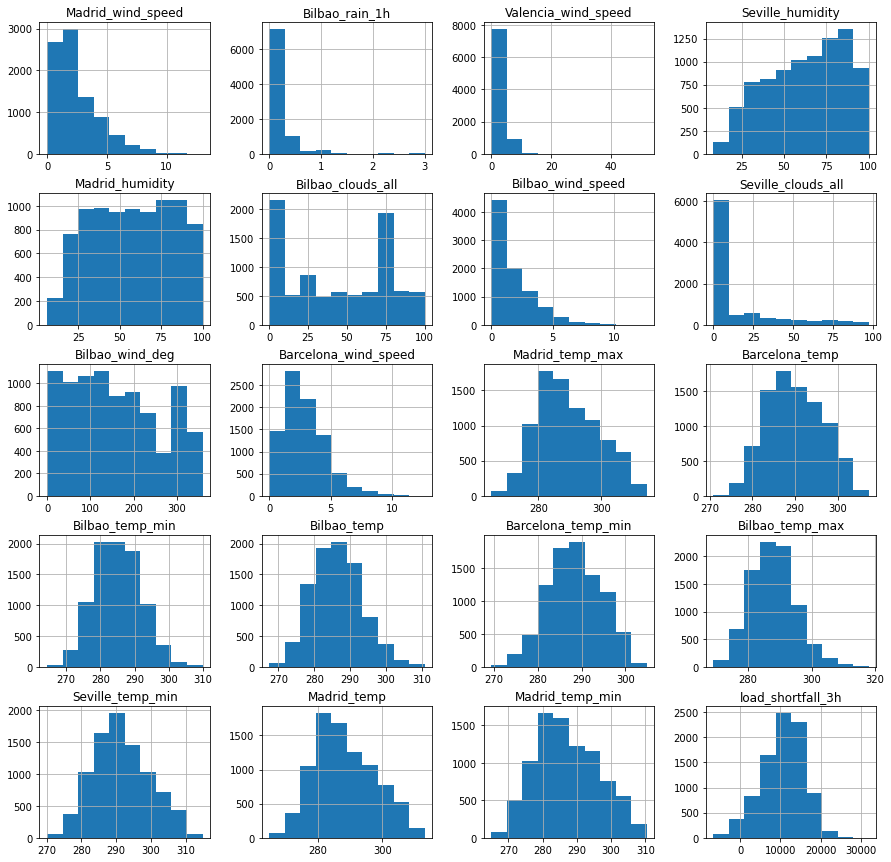

In [9]:
features = [ 'Madrid_wind_speed','Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Madrid_temp_max', 'Barcelona_temp','Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min','Bilbao_temp_max','Seville_temp_min','Madrid_temp','Madrid_temp_min','load_shortfall_3h']
df[features].hist(figsize=(15,15));

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases. There are three different correlation measures:

- Pearson correlation
- Spearman rank correlation
- Kendall correlation
        

In [10]:
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


Multivariate Analysis: Graphical

For the multivariate graphical analysis the following visualisations will be considered:

- Heatmap
- Scatter Plot
- Pair Plot
- Joint Plot
- Bubble Plot

Heatmap

The relationship between features can also be displayed graphically using a heatmap. The Seaborn library will be used for this basic heatmap visualisation.

The correlation coefficient value will be displayed on the heatmap.

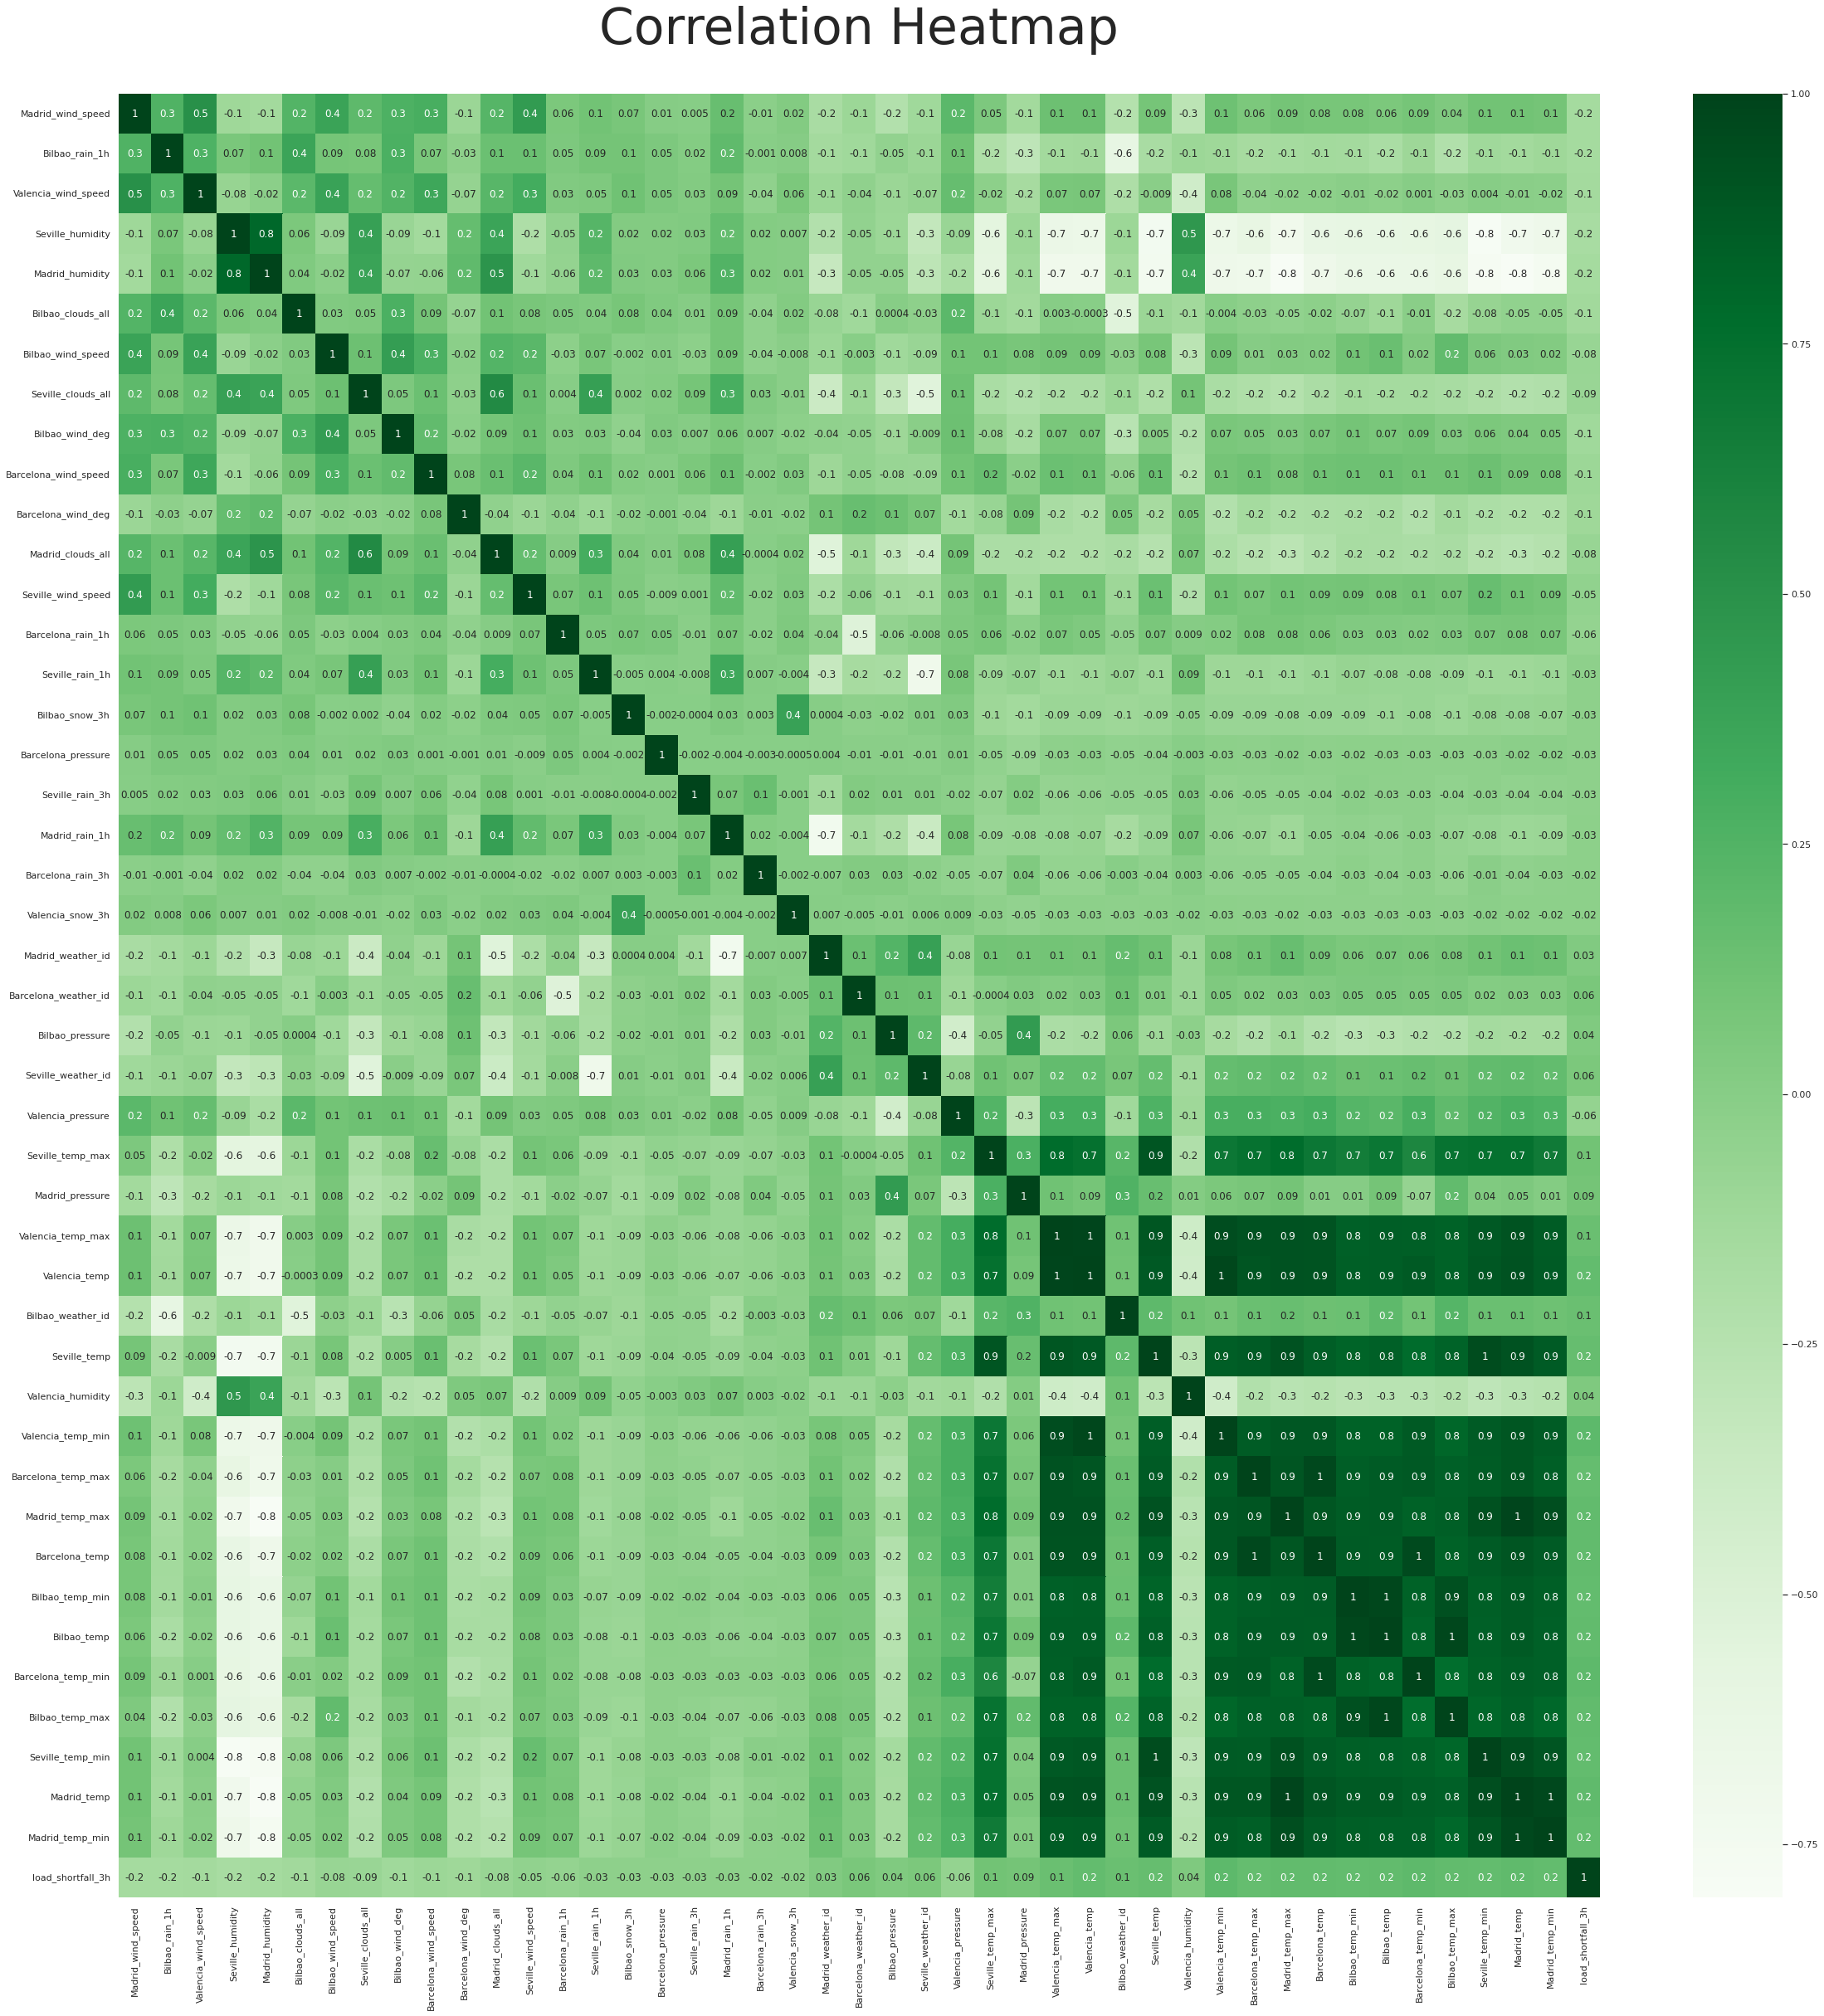

In [11]:
plt.figure(figsize=(40,40))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Greens", fmt='.1g')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':60}, pad=60);

As we are entering Data Engineering we find it, it is best to load both df_train.csv and df_test.csv files.

In [12]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [13]:
df = pd.concat([df_train, df_test])
df.shape

(11683, 49)

The shape command shows us that we have **11683** rows of data and **49** features unlike in the previous shape command we had **8763** rows. This confirms that we have two set of data.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

First let us get some more information using the info command to confirm categorical and numerical features.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [15]:
(df.isnull().sum())

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [16]:
clean_data = df
clean_data['Valencia_pressure'] = clean_data['Valencia_pressure'].fillna(clean_data['Valencia_pressure'].mode()[0])

In [17]:
clean_data['time'] = pd.to_datetime(clean_data['time'])

In [18]:
clean_data['Valencia_wind_deg'] = clean_data['Valencia_wind_deg'].str.extract('(\d+)')

In [19]:
clean_data['Seville_pressure'] = clean_data['Seville_pressure'].str.extract('(\d+)')

In [20]:
clean_data['Valencia_wind_deg'] = pd.to_numeric(clean_data['Valencia_wind_deg'])

In [21]:
clean_data['load_shortfall_3h'] = clean_data['load_shortfall_3h'].fillna(clean_data['load_shortfall_3h'].mode()[0])

In [22]:
clean_data = clean_data.drop(['Unnamed: 0' , 'time'], axis = 1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

from tqdm import tqdm
import math
import random

from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns


In [24]:
y = clean_data[:len(df_train)][['load_shortfall_3h']]

x = clean_data[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_train = clean_data[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = clean_data[len(df_train):].drop('load_shortfall_3h',axis=1)

In the commands below we dropping columns with biggest outleirs and that does not positively increase the RMSE after removal.

    x = x.drop(['Bilbao_snow_3h'], axis = 1)
    x = x.drop(['Barcelona_pressure'], axis = 1)
    x = x.drop(['Valencia_snow_3h'], axis = 1)


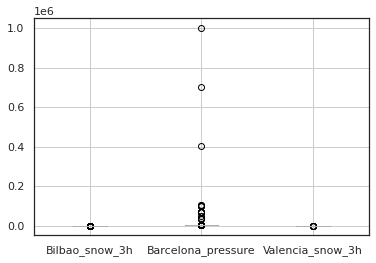

In [25]:
# create one or more ML models
boxplot = x.boxplot(column=[
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Valencia_snow_3h'])

In [26]:
# evaluate one or more ML models
from sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn import linear_model
clf = linear_model.Lasso(alpha=245)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.12) 

In [28]:
x_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
5261,1.000000,10,0.2,1.000000,93.000000,90.000000,61.333333,0.000000,56.000000,263.666667,...,289.773000,283.823000,289.773000,280.042333,280.042333,289.773000,280.042333,289.023000,283.823000,283.823000
7389,1.000000,4,0.0,1.000000,54.333333,68.000000,75.000000,0.000000,0.000000,53.000000,...,296.816667,295.150000,295.816667,289.150000,290.486667,294.816667,292.150000,295.816667,294.080000,293.150000
7682,3.000000,2,0.0,5.000000,29.000000,18.000000,63.333333,0.666667,0.000000,114.000000,...,302.483333,307.150000,301.316667,291.816667,293.006667,300.150000,294.483333,305.150000,305.586667,303.483333
2263,2.333333,1,0.0,0.666667,79.666667,87.333333,30.000000,0.666667,40.000000,101.333333,...,299.260000,289.670000,296.186667,291.408333,293.925000,293.523333,296.185000,293.816667,289.346667,289.003333
6046,1.000000,6,0.0,1.333333,83.000000,79.000000,0.000000,5.333333,33.333333,126.666667,...,278.150000,273.483333,277.650000,268.483333,273.123333,277.150000,278.816667,280.150000,271.483333,269.150000


In [29]:
x_test.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8698,2.000000,6,0.0,1.000000,85.333333,83.666667,75.000000,1.000000,13.333333,90.000000,...,281.816667,281.150000,280.546667,279.816667,281.213333,279.150000,282.816667,284.816667,280.383333,279.483333
8099,2.000000,10,0.0,3.333333,67.666667,29.333333,0.000000,0.666667,0.000000,70.000000,...,293.483333,288.483333,291.983333,280.816667,282.750000,290.483333,285.150000,294.483333,287.763333,287.150000
2557,1.000000,4,0.0,1.333333,93.000000,94.000000,0.000000,0.333333,0.000000,0.000000,...,283.264167,276.631667,283.264167,276.848333,278.588333,283.264167,280.848333,285.013333,276.261667,275.965000
8507,2.333333,10,0.5,2.666667,79.333333,64.000000,83.666667,1.000000,9.333333,73.333333,...,280.150000,276.150000,278.190000,275.816667,276.796667,275.816667,278.150000,283.816667,275.010000,274.150000
2776,2.666667,7,0.0,4.333333,55.333333,54.000000,8.666667,3.333333,0.000000,227.666667,...,286.650000,287.480000,286.650000,285.872167,287.345500,286.650000,289.205500,292.343333,287.140000,286.813333




Now we will use the first two lines for Ridge Regression or the last two lines for Lasso

In [30]:
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [31]:
from sklearn.linear_model import LinearRegression

g_4 = LinearRegression()

g_4.fit(x_train, y_train)

LinearRegression()

In [32]:
preds_two = g_4.predict(x_test)

In [34]:
import pickle

model_save_path = "g_4_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(g_4,file)

In [35]:
import pickle

model_save_path = "clf_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(clf,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
rmse(y_test, preds_two)

In [ ]:
rmse(y_test, preds)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, preds)

In [ ]:
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

In [ ]:
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic